In [ ]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# reading in data
df = pd.read_excel("currentexpense2324.xlsx")
df.head()

,CO,CDS,District,EDP 365,Current\nExpense ADA,Current\nExpense per ADA,LEA Type
0,1,61119,Alameda Unified,1.550948e+08,8567.86,18101.93,Unified
1,1,61127,Albany City Unified,6.149090e+07,3435.41,17899.14,Unified
2,1,61143,Berkeley Unified,2.205508e+08,8572.17,25728.70,Unified
3,1,61150,Castro Valley Unified,1.424913e+08,8991.52,15847.30,Unified
4,1,61168,Emery Unified,1.586300e+07,554.70,28597.44,Unified


In [34]:
# making conversion dict for County ID values
conversion_df = pd.read_excel('CO-Name.xlsx')
conversion_dict = {}
for i in range(len(conversion_df)):
    conversion_dict[conversion_df['CO'][i]] = conversion_df['County'][i]
conversion_dict

{1: 'Alameda',
 2: 'Alpine',
 3: 'Amador',
 4: 'Butte',
 5: 'Calaveras',
 6: 'Colusa',
 7: 'Contra Costa',
 8: 'Del Norte',
 9: 'El Dorado',
 10: 'Fresno',
 11: 'Glenn',
 12: 'Humboldt',
 13: 'Imperial',
 14: 'Inyo',
 15: 'Kern',
 16: 'Kings',
 17: 'Lake',
 18: 'Lassen',
 19: 'Los Angeles',
 20: 'Madera',
 21: 'Marin',
 22: 'Mariposa',
 23: 'Mendocino',
 24: 'Merced',
 25: 'Modoc',
 26: 'Mono',
 27: 'Monterey',
 28: 'Napa',
 29: 'Nevada',
 30: 'Orange',
 31: 'Placer',
 32: 'Plumas',
 33: 'Riverside',
 34: 'Sacramento',
 35: 'San Benito',
 36: 'San Bernardino',
 37: 'San Diego',
 38: 'San Francisco',
 39: 'San Joaquin',
 40: 'San Luis Obispo',
 41: 'San Mateo',
 42: 'Santa Barbara',
 43: 'Santa Clara',
 44: 'Santa Cruz',
 45: 'Shasta',
 46: 'Sierra',
 47: 'Siskiyou',
 48: 'Solano',
 49: 'Sonoma',
 50: 'Stanislaus',
 51: 'Sutter',
 52: 'Tehama',
 53: 'Trinity',
 54: 'Tulare',
 55: 'Tuolumne',
 56: 'Ventura',
 57: 'Yolo',
 58: 'Yuba'}

In [35]:
# cleaning data
df = df.drop(columns=['CDS', 'District', 'EDP 365', 'Current\nExpense ADA', 'LEA Type'])
df = df.rename(columns={'Current\nExpense per ADA' : 'Expense per ADA'})
df['CO'] = df['CO'].map(conversion_dict)
df.head()

,CO,Expense per ADA
0,Alameda,18101.93
1,Alameda,17899.14
2,Alameda,25728.70
3,Alameda,15847.30
4,Alameda,28597.44


In [36]:
df_aggregated = df.groupby('CO').agg('mean')
df_aggregated.head(10)

,Expense per ADA
CO,
Alameda,22015.700000
Alpine,59610.760000
Amador,15659.380000
Butte,22534.752308
Calaveras,19967.307500
Colusa,16637.125000
Contra Costa,17936.416111
Del Norte,21262.530000
El Dorado,20485.760667


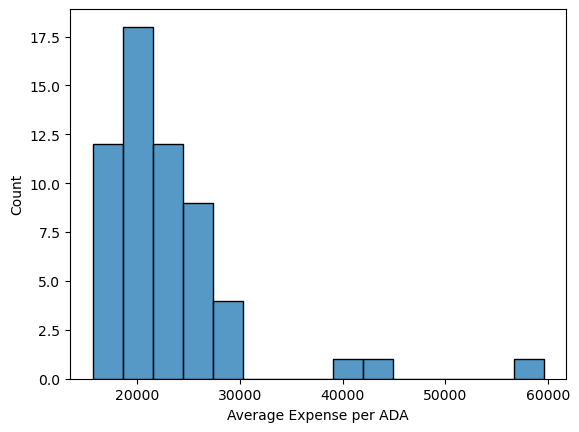

In [37]:
sns.histplot(data=df_aggregated, x='Expense per ADA');
plt.xlabel('Average Expense per ADA');